# Pacific variability and ENSO

Here, we will do a similar analysis than last week, but focussing on the equatorial Pacific. The dominant process along the equator is upwelling, due to the westward tradewinds pushing surface waters northward in the northern hemisphere, and southward in the southern hemisphere due to the earth rotation, resulting in upwelling of cold water from below along the equator. While that upwelling is easily seen in satellite sea surface temperature images, can we see it in drifter tracks?

The global database of drifter tracks is widely available over the internet; the instructions on how to obtain the data for any region are given at the end of this lecture. We have extracted the data for the area and saved as a cvs file.

<img src="./images/equatorial_sst.png" style="width: 400px">


In [1]:
import pandas as pd
import numpy as np

drifters = pd.read_csv('/home/sunset0/htdocs/ges/ocn463-data/woce/drift/pacdrift.gz', compression='gzip', na_values = 999.999)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sunset0/htdocs/ges/ocn463-data/woce/drift/pacdrift.gz'

In [ ]:
drifters

There's a lot more data here than there was in the previous lecture. Let's make a plot of every 100th track

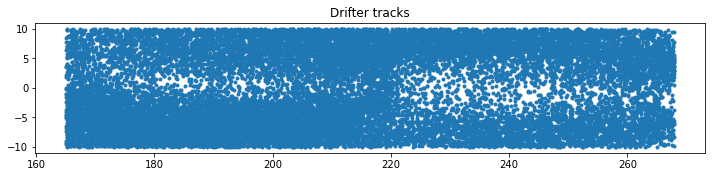

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(drifters['lon'][::100], drifters['lat'][::100], '.')
ax.set_title('Drifter tracks')
ax.set_aspect('equal')

There are some gaps, but we can still see what the currents are like. Let's make boxes of 1/2 degree latitude and all longitudes, and find the average U and V in each box as well as the standard deviation of them.

In [25]:
cenlon, cenlat = np.meshgrid(np.arange(165.5, 267.6, 0.5), np.arange(-9.5, 9.6, 0.5))
Umean = np.nan * np.ones_like(cenlon)
Vmean = np.nan * np.ones_like(cenlon)
Ustd = np.nan * np.ones_like(cenlon)
Vstd = np.nan * np.ones_like(cenlon)

for ilat in range(cenlon.shape[0]):
    for ilon in range(cenlon.shape[1]):
        boxlat = np.where(np.absolute(drifters['lat']-cenlat[ilat, ilon]) < 0.5)[0]
        boxlon = np.where(np.absolute(drifters['lon']-cenlon[ilat, ilon]) < 0.5)[0]
        box = np.array(sorted(set(boxlat) & set(boxlon)))
        Umean[ilat, ilon] = np.nanmean(drifters['u'][box])
        Vmean[ilat, ilon] = np.nanmean(drifters['v'][box])
        Ustd[ilat, ilon] = np.nanstd(drifters['u'][box])
        Vstd[ilat, ilon] = np.nanstd(drifters['v'][box])

In [5]:
cenlon

array([[165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       ...,
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5]])

In [6]:
cenlat

array([[-9.5, -9.5, -9.5, ..., -9.5, -9.5, -9.5],
       [-9. , -9. , -9. , ..., -9. , -9. , -9. ],
       [-8.5, -8.5, -8.5, ..., -8.5, -8.5, -8.5],
       ...,
       [ 8.5,  8.5,  8.5, ...,  8.5,  8.5,  8.5],
       [ 9. ,  9. ,  9. , ...,  9. ,  9. ,  9. ],
       [ 9.5,  9.5,  9.5, ...,  9.5,  9.5,  9.5]])

And now let's plot then

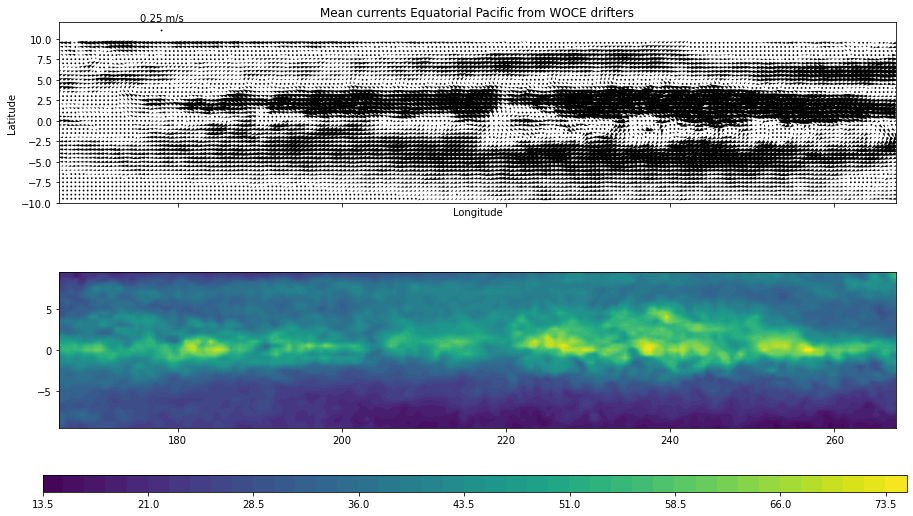

In [26]:
fig, ax = plt.subplots(2,1,figsize=(15,8), sharex=True)
q = ax[0].quiver(cenlon, cenlat, Umean, Vmean)
ax[0].quiverkey(q, 178, 11, 0.25, '0.25 m/s', coordinates='data')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Mean currents Equatorial Pacific from WOCE drifters')
ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)
cs = ax[1].contourf(cenlon, cenlat, np.sqrt(Ustd**2 + Vstd**2), levels=50)
ax[1].set_aspect('equal')

cbaxes = fig.add_axes([0.11, 0.05, 0.8, 0.03]) 
cb = plt.colorbar(cs, cax = cbaxes, orientation='horizontal') 


Now let's try making zonal strips

In [27]:
cenlat1 = np.arange(-9.5, 9.6, 0.5)
Umean1 = np.nan * np.ones_like(cenlat1)
Vmean1 = np.nan * np.ones_like(cenlat1)
Ustd1 = np.nan * np.ones_like(cenlat1)
Vstd1 = np.nan * np.ones_like(cenlat1)

for ilat in range(len(cenlat1)):
    strip = np.where(np.absolute(drifters['lat']-cenlat1[ilat]) < 0.5)[0]
    Umean1[ilat] = np.nanmedian(drifters['u'][strip])
    Vmean1[ilat] = np.nanmedian(drifters['v'][strip])
    Ustd1[ilat] = np.nanstd(drifters['u'][strip])
    Vstd1[ilat] = np.nanstd(drifters['v'][strip])

And plot them

Text(0.5, 1.0, 'standard deviation')

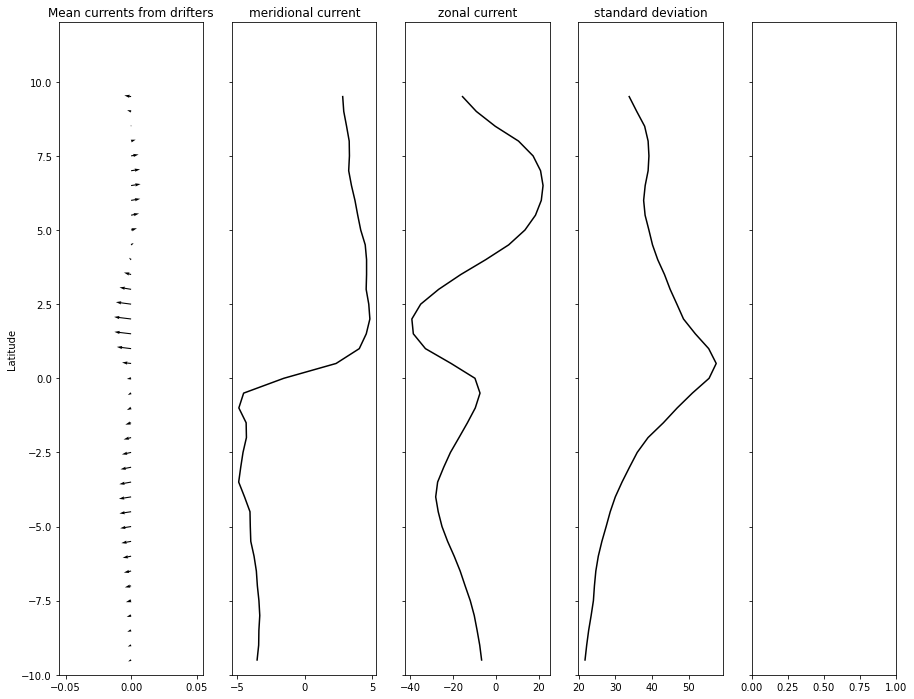

In [28]:
fig, ax = plt.subplots(1,5,figsize=(15,12), sharey=True)
q = ax[0].quiver(np.zeros_like(cenlat1), cenlat1, Umean1, Vmean1)
ax[0].quiverkey(q, -178, 11, 0.25, '0.25 m/s', coordinates='data')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Mean currents from drifters')
#ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)
cs = ax[1].plot(Vmean1, cenlat1, 'k')
ax[1].set_title('meridional current')
cs = ax[2].plot(Umean1, cenlat1, 'k')
ax[2].set_title('zonal current')
cs = ax[3].plot(np.sqrt(Ustd1**2+Vstd1**2), cenlat1, 'k')
ax[3].set_title('standard deviation')

North Equatorial Counter Current: 5N to 8N  EASTWARD
North Equatorial Current: 9N to 20N (Hawaii) WESTWARD
South Equatorial Current: -12S to 4N WESTWARD

# Sea surface temperatures (SST)

Most of the drifting buoys have a surface temperature sensor attached to the flotation sphere. We will now use the surface temperature data to procuce maps of SST and compare with the velocity map.

First, we produce a gridded temperature array, using a similar loop as for estimating the gridded ''u'' and ''v'' arrays:

In [34]:
Tmean = np.nan * np.ones_like(cenlon)
Tstd = np.nan * np.ones_like(cenlon)

for ilat in range(cenlon.shape[0]):
    for ilon in range(cenlon.shape[1]):
        boxlat = np.where(np.absolute(drifters['lat']-cenlat[ilat, ilon]) < 0.5)[0]
        boxlon = np.where(np.absolute(drifters['lon']-cenlon[ilat, ilon]) < 0.5)[0]
        box = np.array(sorted(set(boxlat) & set(boxlon)))
        Tmean[ilat, ilon] = np.nanmean(drifters['sst'][box])
        Tstd[ilat, ilon] = np.nanstd(drifters['sst'][box])
        

Just like we plotted the mean velocity vectors, we can plot the mean temperature field:

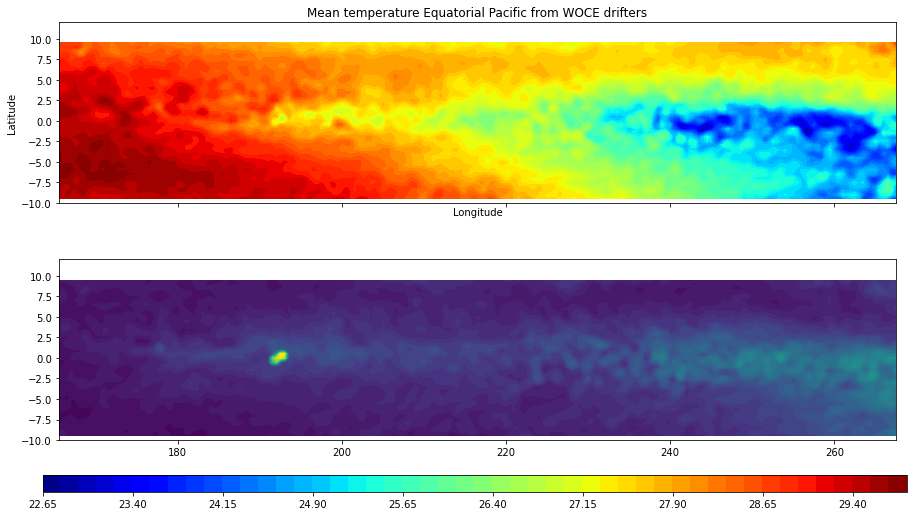

In [40]:
fig, ax = plt.subplots(2,1,figsize=(15,8), sharex=True)
ctm = ax[0].contourf(cenlon, cenlat, Tmean, levels=50, cmap = plt.cm.jet) 
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Mean temperature Equatorial Pacific from WOCE drifters')
ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)

cts = ax[1].contourf(cenlon, cenlat, Tstd, levels=50)
ax[1].set_aspect('equal')
ax[1].set_ylim(-10, 12)

cbaxes = fig.add_axes([0.11, 0.05, 0.8, 0.03]) 
cb = plt.colorbar(ctm, cax = cbaxes, orientation='horizontal') 

We can again compute medians over zonal strips:

In [37]:
cenlat1 = np.arange(-9.5, 9.6, 0.5)
Tmean1 = np.nan * np.ones_like(cenlat1)
Tstd1 = np.nan * np.ones_like(cenlat1)

for ilat in range(len(cenlat1)):
    strip = np.where(np.absolute(drifters['lat']-cenlat1[ilat]) < 0.5)[0]
    Tmean1[ilat] = np.nanmedian(drifters['sst'][strip])
    Tstd1[ilat] = np.nanstd(drifters['sst'][strip])


and plot the meridional profiles on the side of the meridional velocity plots:

Text(0.5, 1.0, 'mean temperature')

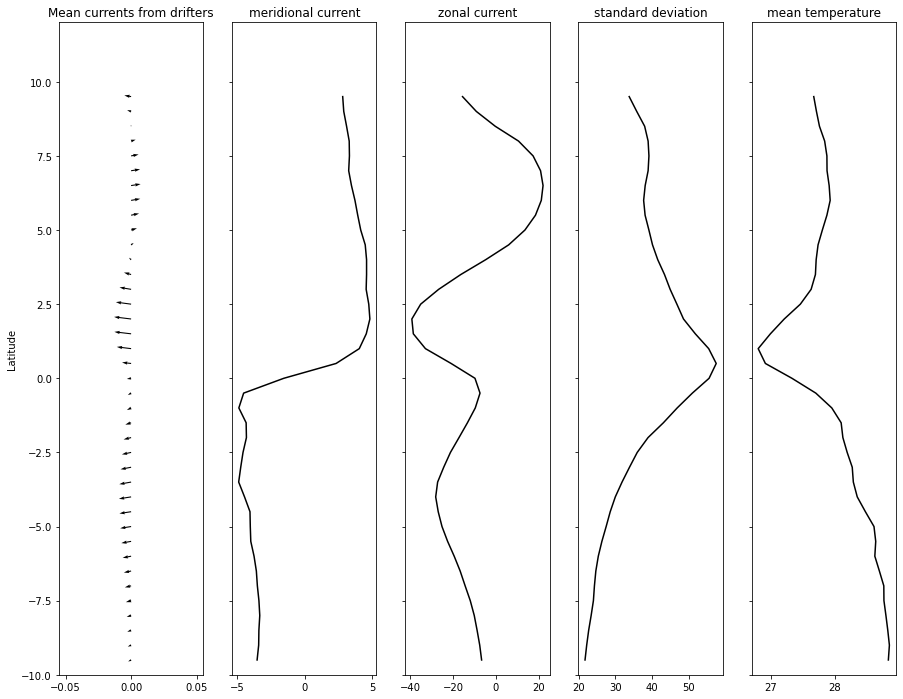

In [38]:
fig, ax = plt.subplots(1,5,figsize=(15,12), sharey=True)
q = ax[0].quiver(np.zeros_like(cenlat1), cenlat1, Umean1, Vmean1)
ax[0].quiverkey(q, -178, 11, 0.25, '0.25 m/s', coordinates='data')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Mean currents from drifters')
#ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)
cs = ax[1].plot(Vmean1, cenlat1, 'k')
ax[1].set_title('meridional current')
cs = ax[2].plot(Umean1, cenlat1, 'k')
ax[2].set_title('zonal current')
cs = ax[3].plot(np.sqrt(Ustd1**2+Vstd1**2), cenlat1, 'k')
ax[3].set_title('standard deviation')
cs = ax[4].plot(Tmean1, cenlat1, 'k')
ax[4].set_title('mean temperature')


In [39]:
whos

Variable   Type              Data/Info
--------------------------------------
Tmean      ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Tmean1     ndarray           39: 39 elems, type `float64`, 312 bytes
Tstd       ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Tstd1      ndarray           39: 39 elems, type `float64`, 312 bytes
Umean      ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Umean1     ndarray           39: 39 elems, type `float64`, 312 bytes
Ustd       ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Ustd1      ndarray           39: 39 elems, type `float64`, 312 bytes
Vmean      ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Vmean1     ndarray           39: 39 elems, type `float64`, 312 bytes
Vstd       ndarray           39x205: 7995 elems, type `float64`, 63960 bytes
Vstd1      ndarray           39: 39 elems, type `float64`, 312 bytes
ax         ndarray           5: 5 elems, type 